# Домашнее задание к занятию 2.1: Деревья решений. Классификация

## Обзор прошедшего занятия

## Домашнее задание

**Lvl 1:**

* взять подготовленные раннее данные из задачи **Titanic**, обучиться на них с помощью дерева решений и кросс-валидации и сделать сабмит
* кросс-валидацию желательно сделать сразу по нескольким фичам ( параметр *grid* в *GridSearchCV* )
* определить самые важные фичи
* вывести дерево решений (можете попробовать установить pydot и webgraphviz для отрисовки деревьев внутри ноутбука)

**Результат:** скрины нового сабмита на Kaggle и построенного дерева

In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from math import sqrt

In [51]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV

In [52]:
import os 
os.chdir ('E://Netology/AML/3._Decision_tree')

In [53]:
data = pd.read_csv( './data/titanic.csv' )
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [55]:
#data.profile_report()

In [56]:
 data = data.fillna(data.mean())

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns_for_encode = ['Ticket']
for column in columns_for_encode:
    data[column + "_enc"] = le.fit_transform(data[column])

In [58]:
data = pd.get_dummies( data, columns = [ 'Embarked' ] )
data = pd.get_dummies( data, columns = [ 'Sex' ] )

In [59]:
X = data.drop(['Survived','Cabin','Name','Ticket'], axis=1)
y = data['Survived']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Ticket_enc,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,3,22.0,1,0,7.2500,523,0,0,1,0,1
1,2,1,38.0,1,0,71.2833,596,1,0,0,1,0
2,3,3,26.0,0,0,7.9250,669,0,0,1,1,0
3,4,1,35.0,1,0,53.1000,49,0,0,1,1,0
4,5,3,35.0,0,0,8.0500,472,0,0,1,0,1


In [15]:
depths = np.arange(1,10)
features_num = np.arange(5,15)
grid = {'max_depth': depths, 'max_features': features_num}
gridsearch = GridSearchCV(DecisionTreeClassifier(), grid,  cv=3)

In [16]:
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
    

In [17]:
sorted(gridsearch.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_max_features',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [18]:
gridsearch.best_params_


{'max_depth': 4, 'max_features': 7}

In [19]:
gridsearch.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       108
           1       0.70      0.73      0.72        71

    accuracy                           0.77       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179



In [23]:
model.score(X_test,y_test)

0.770949720670391

No handles with labels found to put in legend.


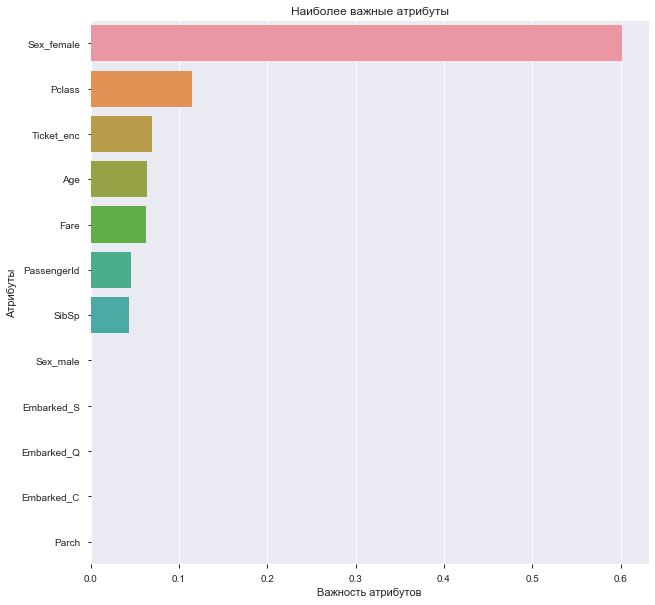

In [25]:
headers = list(X_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

In [46]:
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
#tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(model, out_file = './tree.dot', feature_names = X_train.columns, rounded = True, precision = 1)
# Use dot file to create a graph
#(graph, ) = pydot.graph_from_dot_file('./tree.dot')
# Write graph to a png file
#graph.write_png('./tree.png')

In [47]:

import os
os.environ["PATH"] += os.pathsep + "C://Program Files (x86)/Graphviz/bin/"


In [48]:
from subprocess import call
call(['dot', '-Tpng', './tree.dot', '-o', 'tree.png', '-Gdpi=600'])

0

In [49]:
from IPython.display import Image
Image(filename = 'tree.png')